## 20 Newsgroup Text Classification

### Importing the datasets

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove =('headers','footers','quotes'))
newsgroups_test = fetch_20newsgroups(subset='test',remove =('headers','footers','quotes'))

### Viewing the dataset details

In [4]:
from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


### Pre-Processing the data and creating corpus

In [5]:
import re
import gensim
from nltk.corpus import stopwords  # for using english stopwords
from gensim.models.phrases import Phrases
from gensim.utils import deaccent, lemmatize
stops = stopwords.words('english')

C:\Anaconda2\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [43]:
def preprocess(newsg): 
    newsg = newsg.split()
    newsg = lemmatize(' '.join(newsg), re.compile('(NN)'), stopwords=stops, min_length=3, max_length=15)
    newsg = ' '.join([word.split('/')[0] for word in newsg])
    return newsg

In [9]:
for i in range(len(newsgroups_train.data)):
    newsgroups_train.data[i]=preprocess(newsgroups_train.data[i])

KeyboardInterrupt: 

In [ ]:
for i in range(len(newsgroups_test.data)):
    newsgroups_test.data[i]=preprocess(newsgroups_test.data[i])

In [ ]:
import pickle
newsgroups_train_data=newsgroups_train.data
pickle.dump(newsgroups_train_data, open( "newsgroups_train_data.p", "wb" ) )

In [ ]:
import pickle
newsgroups_test_data=newsgroups_test.data
pickle.dump(newsgroups_test_data, open( "newsgroups_test_data.p", "wb" ) )

### Evaluating the models to be built

In [18]:
import pickle
newsgroups_train_data = pickle.load( open( "newsgroups_train_data.p", "rb" ) )
newsgroups_test_data = pickle.load( open( "newsgroups_test_data.p", "rb" ) )

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt

%matplotlib inline
categories = list(newsgroups_train.target)

In [20]:
my_tags=list(newsgroups_train.target_names)
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=90)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

### Building Models using Logistic Regression


### Bag of Words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
count_vectorizer = CountVectorizer(max_features=10000,ngram_range=(1,1))

accuracy 0.61165693043
confusion matrix
 [[143   5   1   2   1   3   4   3   4  17   5   3   6   7  18  39   4  13
   10  31]
 [  4 248  21  12   8  24   3   2   3  14   0   8  19   3  10   6   0   2
    1   1]
 [  4  27 215  34  17  27  12   5   2  19   0   3   6   3   9   1   1   1
    5   3]
 [  0  16  47 204  42   9  17   4   0  11   2   5  27   1   2   1   1   1
    2   0]
 [  0  10  11  39 240   7  15   8   4  19   0   5  18   3   4   1   0   0
    0   1]
 [  2  40  46  14  10 232   2   3   3  15   0   4   6   1   4   2   2   5
    3   1]
 [  0   6   2  20  15   3 275  15   9  16   1   1  14   1   4   3   2   1
    1   1]
 [  5   4   2   4   4   5  14 256  21  40   3   0  18   1   1   2   4   3
    6   3]
 [  3   3   1   2   5   4   3  31 261  28   1   0  19   4   9   3   6   1
    7   7]
 [  1   2   2   2   2   2   7   8   6 333  14   2   3   1   5   1   2   2
    2   0]
 [  1   1   1   3   1   1   1   6   7  32 331   0   1   2   2   1   4   0
    2   2]
 [ 10  12   8   3   8   

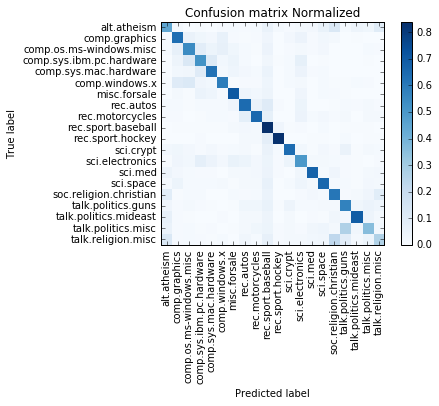

In [23]:
train_count_features = count_vectorizer.fit_transform(newsgroups_train_data)
clf_count = LogisticRegression()
clf_count = clf_count.fit(train_count_features, categories)
test_count_features = count_vectorizer.transform(newsgroups_test_data)
predictions = clf_count.predict(test_count_features)
evaluate_prediction(predictions, list(newsgroups_test.target))

### TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000,norm='l2', use_idf=True, smooth_idf=False) 

accuracy 0.649362719065
confusion matrix
 [[139   5   1   0   0   1   2   3  20   4   5   2   2   9  16  64   8  15
    6  17]
 [  2 261  18  14   6  23   5   2  11   2   0   7  14   3  14   4   0   1
    2   0]
 [  5  27 220  28  15  34  11   2  19   0   1   3   2   6  13   1   1   0
    4   2]
 [  0  13  39 225  35   8  10   2  10   2   1   3  37   0   3   1   2   0
    1   0]
 [  0   9  13  36 244   6  14   2  18   0   1   2  22   8   7   0   0   1
    1   1]
 [  0  46  33   8   7 261   3   1  12   2   0   0   8   1   7   2   1   2
    1   0]
 [  0   7   2  27  14   2 274  12  18   6   1   1  14   2   4   0   2   2
    1   1]
 [  4   4   0   1   0   3  14 264  52   5   1   1  23   0   8   2   6   1
    7   0]
 [  1   2   1   0   3   2   4  24 303   6   2   0  16   7   6   4   4   2
    8   3]
 [  0   2   1   3   0   2   7   4  23 313  21   1   2   4   0   4   0   3
    7   0]
 [  0   2   1   1   0   0   0   2  12  15 346   0   2   4   4   2   3   2
    2   1]
 [  5  11   4   3   8  

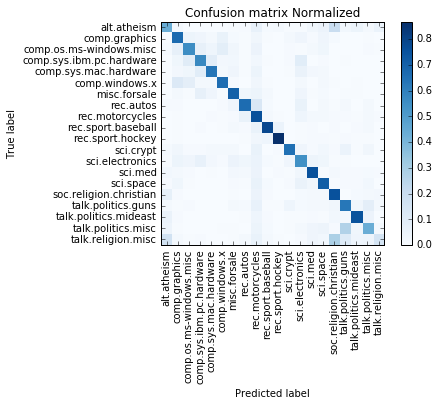

In [25]:
train_tfidf_features = tfidf_vectorizer.fit_transform(newsgroups_train_data)
clf_tfidf = LogisticRegression()
clf_tfidf = clf_tfidf.fit(train_tfidf_features, categories)
test_tfidf_features = tfidf_vectorizer.transform(newsgroups_test_data)
predictions = clf_tfidf.predict(test_tfidf_features)
evaluate_prediction(predictions,list(newsgroups_test.target)) 

import pickle
newsgroups_train = pickle.load( open( "newsgroups_train_data.p", "rb" ) )
newsgroups_test = pickle.load( open( "newsgroups_test_data.p", "rb" ) )

In [45]:
location = input("Enter the location")
my_tags=list(newsgroups_train.target_names)
document = raw_input("Enter a document")
pre_document = preprocess(document)
b=[]
b.append(pre_document)
print b
tfidf_features = tfidf_vectorizer.transform(b)
predictions = clf_tfidf.predict(tfidf_features)
print predictions
print my_tags[predictions]

Enter a document[‎12/‎13/‎2016 7:14 PM] Soumya Ghosh:  No Title From: kdw@icd.ab.com (Kenneth D. Whitehead) Subject: Re: The Holocaust Revisited Nntp-Posting-Host: sora.icd.ab.com Organization: Allen-Bradley Company, Inc. Lines: 51  mcsdc1jpb@dct.ac.uk (John Bell) babbles from Scotland, one of England's last remaining colonies:  >Are you for real?  >People dumb enough to give their money and possessions to a guy who says he's >jesus deserve all they get  People who were dumb enough to believe Klinton was a moderate deserve what they get too.  It's a real laugh to hear them try to justify this massacre with bullsh*t about how concerned they were about how our tax money was was being spent.  (Wasting money keeping Texans alive?  Hell no. let's spend it to import Haitians with AIDS so we can treat them at taxpayer expense.  %^P  )  >Anyway, he killed a few feds  So what?  The Feds killed 90+ civilians when they "ran out of patience", to use their own phrase.  If the Feds hadn't attacked t